First I imported libraries that might be useful.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor

import gc; gc.enable()

import warnings
warnings.filterwarnings("ignore")

Then I imported the csv file.

In [10]:
df = pd.read_csv('kc_house_data.csv')

I looked at info to get an idea of what the columns were and to get an idea about null values.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Fortunately, there weren't a lot of null values. My first thought was to replace all of the null values for
water front will 0. I figured that if a waterfront view was not mentioned, it probably meant that there wasn't one.
Also, There weren't many of them, so I figured it wouldn't harm the data much to make that assumption, even if it were incorrect.

In [58]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.006760      0.233863      3.409825   
std    4.141264e+04      0.539683      0.081944      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [42]:
df.waterfront.fillna(0, inplace = True)

In [43]:
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [59]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

The next category of null values I decided to look was the view category. After looking at the data, there were only 63 missing values, so I figured that changing the values wouldn't alter the data that much. My first thought was to replace the null values with the average. After looking at the value counts, it became clear that the vast majority of the homes had a 0 view rating. Therefore, I decided to see if homes with a 0 view rating were on average less expensive.

In [62]:
df[df.view == 0].price.mean()

496806.0655442282

In [63]:
df[df.view != 0].price.mean()

928651.8128735633

In [57]:
df[df.view.isnull()].price.mean()

621958.1746031746

I learned a couple things from this. One, homes with a 0 view rating were significantly cheaper than homes with a non 0 view rating. Therefore, it might be a problem to assume a 0 view rating for all null values. I also found that the average null view rating had an average price that was about in the middle of the average for homes with a 0 or non 0 view rating.

In [70]:
df[df.view.isnull()].describe()

id         price   bedrooms  bathrooms  sqft_living  \
count  6.300000e+01  6.300000e+01  63.000000  63.000000    63.000000   
mean   3.938991e+09  6.219582e+05   3.428571   2.154762  2249.174603   
std    2.811234e+09  6.809271e+05   0.892880   0.896261  1117.119720   
min    1.045408e+08  1.440000e+05   2.000000   1.000000   890.000000   
25%    1.845600e+09  3.224750e+05   3.000000   1.750000  1445.000000   
50%    3.448900e+09  4.800000e+05   3.000000   2.250000  2120.000000   
75%    6.021500e+09  6.790000e+05   4.000000   2.500000  2545.000000   
max    9.468200e+09  5.300000e+06   6.000000   6.000000  7390.000000   

            sqft_lot     floors  waterfront  view  condition      grade  \
count      63.000000  63.000000   63.000000   0.0  63.000000  63.000000   
mean    18111.571429   1.484127    0.015873   NaN   3.444444   7.825397   
std     51631.810542   0.499744    0.125988   NaN   0.616383   1.350504   
min      2159.000000   1.000000    0.000000   NaN   3.000000   6.000000   
25%      5766.500000   1.000000    0.000000   NaN   3.000000   7.000000   
50%      7725.000000   1.500000    0.000000   NaN   3.000000   7.000000   
75%     10235.500000   2.000000    0.000000   NaN   4.000000   9.000000   
max    360241.000000   2.500000    1.000000   NaN   5.000000  12.000000   

        sqft_above     yr_built  yr_renovated       zipcode        lat  \
count    63.000000    63.000000     51.000000     63.000000  63.000000   
mean   1802.031746  1970.111111     39.117647  98082.222222  47.530452   
std     839.149761    29.317016    279.355877     55.949702   0.144512   
min     790.000000  1905.000000      0.000000  98001.000000  47.207800   
25%    1195.000000  1950.000000      0.000000  98035.000000  47.397700   
50%    1580.000000  1975.000000      0.000000  98072.000000  47.537800   
75%    2470.000000  1994.000000      0.000000  98125.000000  47.628000   
max    5000.000000  2014.000000   1995.000000  98199.000000  47.776400   

             long  sqft_living15     sqft_lot15  
count   63.000000      63.000000      63.000000  
mean  -122.225619    2096.126984   15220.682540  
std      0.137397     719.023004   33298.112833  
min   -122.408000     900.000000    1288.000000  
25%   -122.328500    1530.000000    5943.000000  
50%   -122.266000    1980.000000    7700.000000  
75%   -122.140500    2500.000000    9665.000000  
max   -121.850000    4470.000000  209959.000000

In [73]:
df[df.view.notnull()].describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.153400e+04  2.153400e+04  21534.000000  21534.000000  21534.000000   
mean   4.582351e+09  5.400577e+05      3.373038      2.115712   2079.827854   
std    2.876779e+09  3.660596e+05      0.926410      0.768602    917.446520   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123212e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904945e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.312175e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.153400e+04  21534.000000  21534.000000  21534.000000  21534.000000   
mean   1.509060e+04      1.494126      0.006734      0.233863      3.409724   
std    4.138021e+04      0.539806      0.081783      0.765686      0.650654   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.617000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068775e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21534.000000  21534.000000  21534.000000  17704.000000  21534.000000   
mean       7.657425   1788.557537   1971.002275     83.765025  98077.939352   
std        1.172643    827.745641     29.376044    400.239690     53.506639   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21534.000000  21534.000000   21534.000000   21534.000000  
mean      47.560180   -122.213948    1986.299944   12751.079502  
std        0.138528      0.140735     685.121001   27255.483308  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471200   -122.328000    1490.000000    5100.000000  
50%       47.571900   -122.230000    1840.000000    7620.000000  
75%       47.678100   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

However, on closer inspection, it now looks like the 25%, 50%, 75% price values are nearly identical for both the null and not null values. Therefore, I will replace the null values with 0.

In [75]:
df.view.fillna(0, inplace = True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Now, the only remaining category with null values is the year renovated category. My first thought is that homes without a year renovated option have never been renovated. However, first I'm going to look at the data to see if I can learn anything from it.

In [81]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [84]:
df[df.yr_renovated.isnull()].price.mean()

538617.0049453409

In [85]:
df[df.yr_renovated.notnull()].price.mean()

540660.0149253731

In [86]:
df[df.yr_renovated == 0].price.mean()

530677.5355358297

In [87]:
df[df.yr_renovated != 0].price.mean()

575976.7860880942

After looking at these breakdowns, I think that it is safe to assume that null values are probably 0. And if not, the average prices appear to be roughly equivalent for those that have never been renovated and those that have.

In [88]:
df.yr_renovated.fillna(0, inplace = True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [228]:
df = df.drop(columns = ['date', 'sqft_basement'])

# Pair Plot

In order to get an idea of how each value interacted with each other value, I utilized a few different tools. I was primarily concerned with three of the key assumptions for a linear regression model, being linearity, normality, and homoscedasticity. The first was the pairplot, which would give me a visual impression of each of these assumptions. 

<Figure size 5760x5760 with 0 Axes>

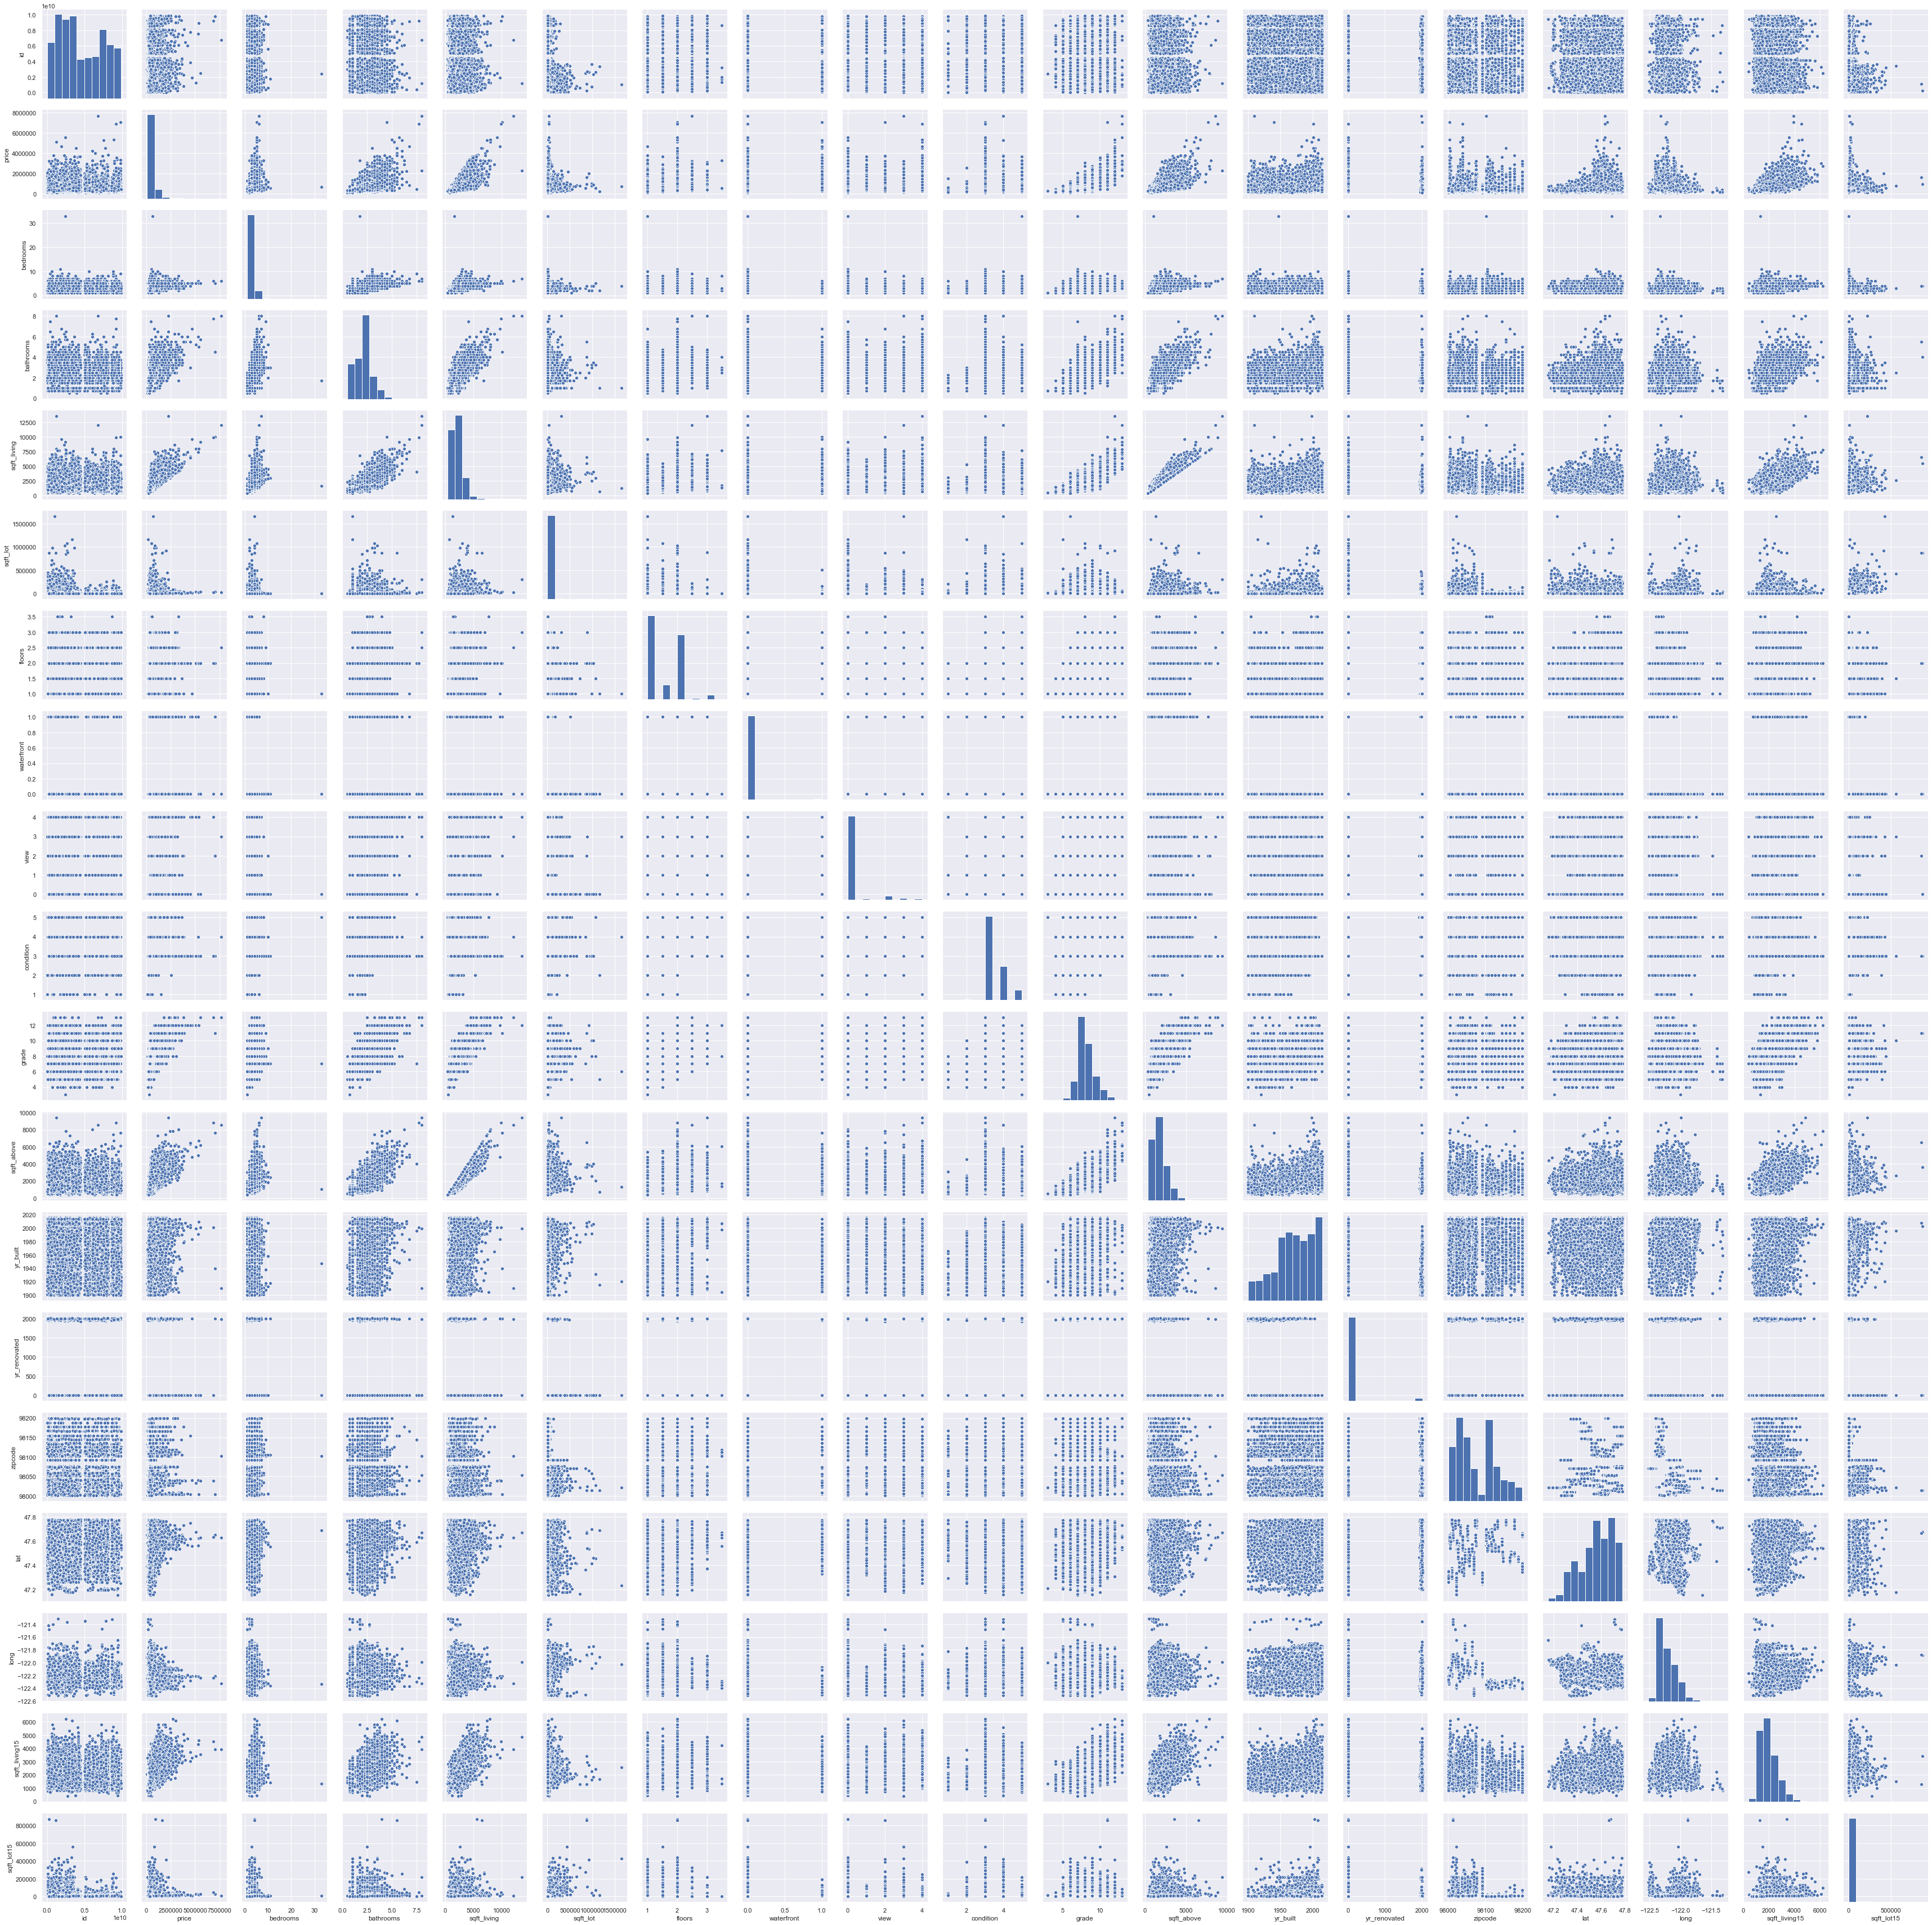

In [236]:
plt.figure(figsize=(80,80))
sns.pairplot(df)

# Absolute Value Correlation Matrix

In order to get a more precise measure of correlation, I then used a correlation matrix. I followed that up with correlation matrices that indicated true or false for being highly correlated (0.7), moderately correlated or better (>.3), and weakly correlated (<.3). 

In [237]:
abs(df.corr())

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.016772  0.001150   0.005162     0.012241  0.131911   
price          0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living    0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot       0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953  0.004814   
waterfront     0.003599  0.264306  0.002127   0.063629     0.104637  0.021459   
view           0.011772  0.393497  0.078354   0.186016     0.281715  0.075054   
condition      0.023803  0.036056  0.026496   0.126479     0.059445  0.008830   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_above     0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated   0.010612  0.117855  0.017900   0.047177     0.051060  0.004979   
zipcode        0.008211  0.053402  0.154092   0.204786     0.199802  0.129586   
lat            0.001798  0.306692  0.009951   0.024280     0.052155  0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15  0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15     0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   

                 floors  waterfront      view  condition     grade  \
id             0.018608    0.003599  0.011772   0.023803  0.008188   
price          0.256804    0.264306  0.393497   0.036056  0.667951   
bedrooms       0.177944    0.002127  0.078354   0.026496  0.356563   
bathrooms      0.502582    0.063629  0.186016   0.126479  0.665838   
sqft_living    0.353953    0.104637  0.281715   0.059445  0.762779   
sqft_lot       0.004814    0.021459  0.075054   0.008830  0.114731   
floors         1.000000    0.020797  0.028414   0.264075  0.458794   
waterfront     0.020797    1.000000  0.380543   0.016648  0.082818   
view           0.028414    0.380543  1.000000   0.045622  0.249082   
condition      0.264075    0.016648  0.045622   1.000000  0.146896   
grade          0.458794    0.082818  0.249082   0.146896  1.000000   
sqft_above     0.523989    0.071778  0.166017   0.158904  0.756073   
yr_built       0.489193    0.024487  0.054452   0.361592  0.447865   
yr_renovated   0.003793    0.073939  0.090339   0.055808  0.015623   
zipcode        0.059541    0.028923  0.085059   0.002888  0.185771   
lat            0.049239    0.012157  0.006321   0.015102  0.113575   
long           0.125943    0.037628  0.077702   0.105877  0.200341   
sqft_living15  0.280102    0.083823  0.278928   0.093072  0.713867   
sqft_lot15     0.010722    0.030658  0.073083   0.003126  0.120981   

               sqft_above  yr_built  yr_renovated   zipcode       lat  \
id               0.010799  0.021617      0.010612  0.008211  0.001798   
price            0.605368  0.053953      0.117855  0.053402  0.306692   
bedrooms         0.479386  0.155670      0.017900  0.154092  0.009951   
bathrooms        0.686668  0.507173      0.047177  0.204786  0.024280   
sqft_living      0.876448  0.318152      0.051060  0.199802  0.052155   
sqft_lot         0.184139  0.052946      0.004979  0.129586  0.085514   
floors           0.523989  0.489193      0.003793  0.059541  0.049239   
waterfront       0.071778  0.024487      0.073939  0.028923  0.012157   
view             0.166017  0.054452      0.090339  0.085059  0.006321   
condition        0.158904  0.361592      0.055808  0.002888  0.015102   
grade            0.756073  0.447865      0.015623  0.185771  0.113575   
sqft_above       1.000000  0.424037      0.020645  0.261570  0.001199   
yr_built         0.424037  1.000000      0.202555 

# Correlation Matrix, Correlation Greater than 0.7

In [238]:
abs(df.corr())>.7

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id              True  False     False      False        False     False   
price          False   True     False      False         True     False   
bedrooms       False  False      True      False        False     False   
bathrooms      False  False     False       True         True     False   
sqft_living    False   True     False       True         True     False   
sqft_lot       False  False     False      False        False      True   
floors         False  False     False      False        False     False   
waterfront     False  False     False      False        False     False   
view           False  False     False      False        False     False   
condition      False  False     False      False        False     False   
grade          False  False     False      False         True     False   
sqft_above     False  False     False      False         True     False   
yr_built       False  False     False      False        False     False   
yr_renovated   False  False     False      False        False     False   
zipcode        False  False     False      False        False     False   
lat            False  False     False      False        False     False   
long           False  False     False      False        False     False   
sqft_living15  False  False     False      False         True     False   
sqft_lot15     False  False     False      False        False      True   

               floors  waterfront   view  condition  grade  sqft_above  \
id              False       False  False      False  False       False   
price           False       False  False      False  False       False   
bedrooms        False       False  False      False  False       False   
bathrooms       False       False  False      False  False       False   
sqft_living     False       False  False      False   True        True   
sqft_lot        False       False  False      False  False       False   
floors           True       False  False      False  False       False   
waterfront      False        True  False      False  False       False   
view            False       False   True      False  False       False   
condition       False       False  False       True  False       False   
grade           False       False  False      False   True        True   
sqft_above      False       False  False      False   True        True   
yr_built        False       False  False      False  False       False   
yr_renovated    False       False  False      False  False       False   
zipcode         False       False  False      False  False       False   
lat             False       False  False      False  False       False   
long            False       False  False      False  False       False   
sqft_living15   False       False  False      False   True        True   
sqft_lot15      False       False  False      False  False       False   

               yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
id                False         False    False  False  False          False   
price             False         False    False  False  False          False   
bedrooms          False         False    False  False  False          False   
bathrooms         False         False    False  False  False          False   
sqft_living       False         False    False  False  False           True   
sqft_lot          False         False    False  False  False          False   
floors            False         False    False  False  False          False   
waterfront        False         False    False  False  False          False   
view              False         False    False  False  False          False   
condition         False         False    False  False  False          False   
grade             False         False    False  False  False           True   
sqft_above        False         False    False  False  False           True   
yr_built 

In [241]:
abs(df.corr())>.3

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id              True  False     False      False        False     False   
price          False   True      True       True         True     False   
bedrooms       False   True      True       True         True     False   
bathrooms      False   True      True       True         True     False   
sqft_living    False   True      True       True         True     False   
sqft_lot       False  False     False      False        False      True   
floors         False  False     False       True         True     False   
waterfront     False  False     False      False        False     False   
view           False   True     False      False        False     False   
condition      False  False     False      False        False     False   
grade          False   True      True       True         True     False   
sqft_above     False   True      True       True         True     False   
yr_built       False  False     False       True         True     False   
yr_renovated   False  False     False      False        False     False   
zipcode        False  False     False      False        False     False   
lat            False   True     False      False        False     False   
long           False  False     False      False        False     False   
sqft_living15  False   True      True       True         True     False   
sqft_lot15     False  False     False      False        False      True   

               floors  waterfront   view  condition  grade  sqft_above  \
id              False       False  False      False  False       False   
price           False       False   True      False   True        True   
bedrooms        False       False  False      False   True        True   
bathrooms        True       False  False      False   True        True   
sqft_living      True       False  False      False   True        True   
sqft_lot        False       False  False      False  False       False   
floors           True       False  False      False   True        True   
waterfront      False        True   True      False  False       False   
view            False        True   True      False  False       False   
condition       False       False  False       True  False       False   
grade            True       False  False      False   True        True   
sqft_above       True       False  False      False   True        True   
yr_built         True       False  False       True   True        True   
yr_renovated    False       False  False      False  False       False   
zipcode         False       False  False      False  False       False   
lat             False       False  False      False  False       False   
long            False       False  False      False  False        True   
sqft_living15   False       False  False      False   True        True   
sqft_lot15      False       False  False      False  False       False   

               yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
id                False         False    False  False  False          False   
price             False         False    False   True  False           True   
bedrooms          False         False    False  False  False           True   
bathrooms          True         False    False  False  False           True   
sqft_living        True         False    False  False  False           True   
sqft_lot          False         False    False  False  False          False   
floors             True         False    False  False  False          False   
waterfront        False         False    False  False  False          False   
view              False         False    False  False  False          False   
condition          True         False    False  False  False          False   
grade              True         False    False  False  False           True   
sqft_above         True         False    False  False   True           True   
yr_built 

In [242]:
abs(df.corr()) < .3

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             False   True      True       True         True      True   
price           True  False     False      False        False      True   
bedrooms        True  False     False      False        False      True   
bathrooms       True  False     False      False        False      True   
sqft_living     True  False     False      False        False      True   
sqft_lot        True   True      True       True         True     False   
floors          True   True      True      False        False      True   
waterfront      True   True      True       True         True      True   
view            True  False      True       True         True      True   
condition       True   True      True       True         True      True   
grade           True  False     False      False        False      True   
sqft_above      True  False     False      False        False      True   
yr_built        True   True      True      False        False      True   
yr_renovated    True   True      True       True         True      True   
zipcode         True   True      True       True         True      True   
lat             True  False      True       True         True      True   
long            True   True      True       True         True      True   
sqft_living15   True  False     False      False        False      True   
sqft_lot15      True   True      True       True         True     False   

               floors  waterfront   view  condition  grade  sqft_above  \
id               True        True   True       True   True        True   
price            True        True  False       True  False       False   
bedrooms         True        True   True       True  False       False   
bathrooms       False        True   True       True  False       False   
sqft_living     False        True   True       True  False       False   
sqft_lot         True        True   True       True   True        True   
floors          False        True   True       True  False       False   
waterfront       True       False  False       True   True        True   
view             True       False  False       True   True        True   
condition        True        True   True      False   True        True   
grade           False        True   True       True  False       False   
sqft_above      False        True   True       True  False       False   
yr_built        False        True   True      False  False       False   
yr_renovated     True        True   True       True   True        True   
zipcode          True        True   True       True   True        True   
lat              True        True   True       True   True        True   
long             True        True   True       True   True       False   
sqft_living15    True        True   True       True  False       False   
sqft_lot15       True        True   True       True   True        True   

               yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
id                 True          True     True   True   True           True   
price              True          True     True  False   True          False   
bedrooms           True          True     True   True   True          False   
bathrooms         False          True     True   True   True          False   
sqft_living       False          True     True   True   True          False   
sqft_lot           True          True     True   True   True           True   
floors            False          True     True   True   True           True   
waterfront         True          True     True   True   True           True   
view               True          True     True   True   True           True   
condition         False          True     True   True   True           True   
grade             False          True     True   True   True          False   
sqft_above        False          True     True   True  False          False   
yr_built 

In [253]:
corr_matrix_abs = abs(df.corr())

In [252]:
corr_matrix = df.corr()

# Correlation Heat Map

Finally, I also used a heat map because the correlation matrix is rather large and filled with text, therefore scanning the data for what I'm looking for can be somewhat challenging. The heatmap helps point me in the right direction.

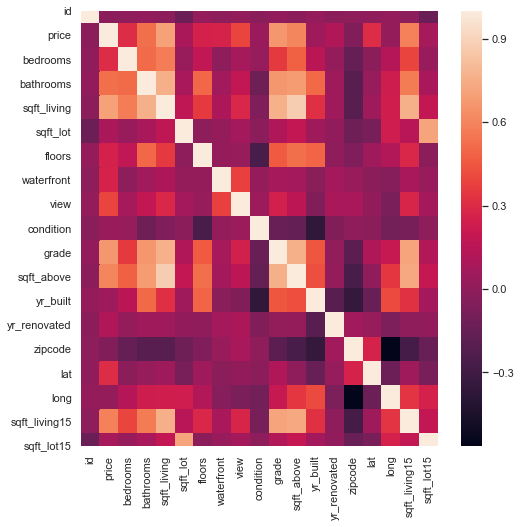

In [254]:
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix)

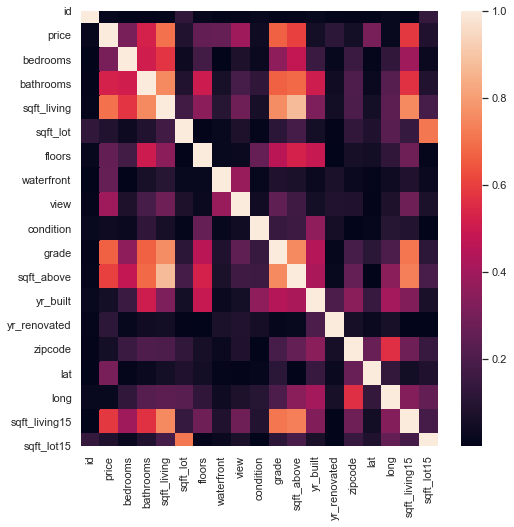

In [255]:
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix_abs)

In [710]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

Here, I set the target to the value that we are interested in predicting: price.

In [229]:
target = 'price'

# Setting Values for X and y Columns

Here, I set up a list of column names in order to use them to create the X value dataframe. I set up 2, one named column_names, the other used_cols. I did this because I wanted one that had all of the values and another that I would manipulate to see if I could improve my error metrics by removing columns.

In [921]:
column_names = X.columns.tolist()

In [922]:
used_cols = [c for c in df.columns.tolist() if c not in [target]]
X, y = df[column_names], df[target]

My first thought was to remove the id column with the presumption that it was an arbitrary identifier for each home with no statistical value.

In [938]:
used_cols.remove('id')

In [939]:
used_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [925]:
column_names

['id',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

This is to practice with modeling. My first attempt is a decission tree.

## Choosing Features

I initially used this space to pick and choose which features I wanted to use for my model, but whenever I started limiting my number of features, my error metrics skyrocketed, so I mostly abandoned this.

In [356]:
house_features = ['sqft_living', 'sqft_lot', 'condition', 'zipcode', 'bedrooms', 'bathrooms', 'view', 'yr_built']

In [357]:
#X = df[house_features]

# Baseline Model

In [1048]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [1053]:
scaler = RobustScaler()
lr = LinearRegression()
pipe1 = make_pipeline(scaler, lr)
scores = cross_val_score(pipe1, X, y, cv=5, scoring='r2')
baseline_linear_R2 = scores.mean()
print("R2:", scores.mean())
scores = -1 * cross_val_score(pipe1, X, y, cv=5, scoring='neg_mean_absolute_error')
baseline_linear_MAE = scores.mean()
print("MAE:", scores.mean())

R2: 0.6946799966781809
MAE: 127142.4003030946


# Scaling the Data with a Pipeline

Here I set up a pipeline in order scale the data. I did this in order to have all of my values on the same scale in the hopes of improving the model. I also used the pipeline in order to simplify the code.

In [943]:
numeric_transformer = Pipeline(steps=[('scaler', RobustScaler())])

In [944]:
X, y = df[used_cols], df[target]

In [946]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, used_cols)])

# Decision Tree Model

My first attempt at a model was the Decision Tree. I wanted to give a quick attempt at each model that I could find in order to see which ones resulted in the best predictions right off the bat.

In [947]:
from sklearn.tree import DecisionTreeRegressor

In [961]:
practice_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier',DecisionTreeRegressor(max_leaf_nodes=500, random_state = 0))])

I removed ID from the list of predictors because it improved my error metrics.

In [962]:
X, y = df[used_cols], df[target]

Here I implemented cross validation in order to improve the quality of my error metrics. By setting CV equal to 5, I am making it so the I am testing the model on each 20% chunk of data, and training it on the remaining 80% chunks.

In [963]:
scores_tree_mae = -1 * cross_val_score(practice_tree, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores_tree_mae)

MAE scores:
 [90193.28811659 89964.32265189 86684.43495219 93363.54993905
 93629.42855501]


In [964]:
print("Average Tree MAE:\n", scores_tree_mae.mean())

Average Tree MAE:
 90767.0048429461


In [965]:
scores_tree_r2 = cross_val_score(practice_tree, X, y, cv=5, scoring='r2')

print("R2 scores:\n", scores)

R2 scores:
 {5: 153894.8847449205, 25: 115266.01752261656, 50: 103488.28397772815, 100: 96833.48049059934, 250: 91468.47661922462, 500: 88793.29225508272}


In [966]:
print("Average Tree R2:\n", scores_tree_r2.mean())

Average Tree R2:
 0.7863517461872256


On my first model, my error metrics were:

Decision Tree R^2 = 0.7864
Decision Tree MAE = 90767

In [969]:
practice_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier',DecisionTreeRegressor(random_state = 0))])

In [1056]:
scores_tree_mae = -1 * cross_val_score(practice_tree, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

scores_tree_r2 = cross_val_score(practice_tree, X, y, cv=5, scoring='r2')

print("Average Tree MAE:\n", scores_tree_mae.mean())
print("Baseline MAE:\n", baseline_linear_MAE)
print("Average Tree R2:\n", scores_tree_r2.mean())
print("Baseline R2:\n", baseline_linear_R2)

Average Tree MAE:
 90665.49426505635
Baseline MAE:
 127142.4003030946
Average Tree R2:
 0.7792572533972029
Baseline R2:
 0.6946799966781809


When not using max leaf nodes, both error metrics got worse.

In [1057]:
practice_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier',DecisionTreeRegressor(max_leaf_nodes=250, random_state = 0))])

scores_tree_mae = -1 * cross_val_score(practice_tree, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

scores_tree_r2 = cross_val_score(practice_tree, X, y, cv=5, scoring='r2')

print("Average Tree MAE:\n", scores_tree_mae.mean())
print("Baseline R2:\n", baseline_linear_MAE)
print("Average Tree R2:\n", scores_tree_r2.mean())
print("Baseline MAE:\n", baseline_linear_MAE)

Average Tree MAE:
 94000.16877302717
Baseline R2:
 127142.4003030946
Average Tree R2:
 0.7734510963420512
Baseline MAE:
 127142.4003030946


When setting max leaf nodes at 250, my error metrics were better than when set at 0, but not as good as when set at 500.

In [1058]:
practice_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier',DecisionTreeRegressor(max_leaf_nodes=1000, random_state = 0))])

scores_tree_mae = -1 * cross_val_score(practice_tree, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

scores_tree_r2 = cross_val_score(practice_tree, X, y, cv=5, scoring='r2')

print("Average Tree MAE:\n", scores_tree_mae.mean())
print("Baseline MAE:\n", baseline_linear_MAE)
print("Average Tree R2:\n", scores_tree_r2.mean())
print("Baseline R2:\n", baseline_linear_R2)

Average Tree MAE:
 91888.32075657364
Baseline MAE:
 127142.4003030946
Average Tree R2:
 0.7628458093602621
Baseline R2:
 0.6946799966781809


Setting max leaf nodes at 1000 results in worse error metrics. Therefore, 500 appears to be the best number to use.

In [977]:
practice_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier',DecisionTreeRegressor(max_leaf_nodes=500, random_state = 0))])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
practice_tree.fit(train_X, train_y)

test_pred = practice_tree.predict(X_test)
train_pred = practice_tree.predict(X_train)

print("R2 for Test:", r2_score(test_pred, y_test))
print("R2 for Train:", r2_score(train_pred, y_train))

R2 for Test: 0.7710860421927206
R2 for Train: 0.945231737883618


In order to see if I am overfitting, I rain a train test split test to see if the R^2 for the training data was significantly higher than for the test data. As the test shows, the R^2 for teh training data was quite a bit higher than for the test data. Therefore, it should be noted that even though max_leaf_nodes is set at roughly the idea number to get the optimal R^2 for the test data, if we received new data that extended beyong the bounds of our current data it is possible that our model would perform poorly as a result of overfitting.

## Function for Mean Absolute Error

Before finding the sklearn method of finding absolute error, i created a function to do the same thing.

In [954]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# Random Forest Regressor Example

The second model that I chose to try was the Random Forest Regressor. I compared the results of this model with the results of the Decision Tree model.

In [982]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(r2_score(melb_preds, y_test))

0.8479283642614945


I used a method that I read on kaggle to try a few different models at once and then see which produced the best error results. I tried different n_estimators and also tried to use criterion, min_samples_split, and max_depth.

In [985]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [986]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

In [987]:
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 67420
Model 2 MAE: 67358
Model 3 MAE: 68340
Model 4 MAE: 67843
Model 5 MAE: 85746


Model 2 resulted in the lowest MAE of 67358.

In [996]:
numeric_transformer = Pipeline(steps=[('scaler', RobustScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, used_cols)])

rf_regr = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier',RandomForestRegressor(n_estimators=100, random_state=0))])

In [997]:
scores_forest_r2 = cross_val_score(rf_regr, X, y, cv=5, scoring='r2')

print("R2 scores:\n", scores_forest_r2)

R2 scores:
 [0.87640583 0.8855791  0.87717469 0.86395379 0.87125022]


In [998]:
scores_forest_r2.mean()

0.8748727298220949

In [999]:
scores_forest_mae = -1 * cross_val_score(rf_regr, X, y, cv=5, scoring='neg_mean_absolute_error')

In [1000]:
scores_forest_mae.mean()

69795.52650680128

In [1059]:
print("Decision Tree R2:\n", scores_tree_r2.mean())
print("Random Forest R2:\n", scores_forest_r2.mean())
print("Baseline R2:\n", baseline_linear_R2)
print("\nDecision Tree MAE:\n", scores_tree_mae.mean())
print("Random Forest MAE:\n", scores_forest_mae.mean())
print("Baseline MAE:\n", baseline_linear_MAE)

Decision Tree R2:
 0.7628458093602621
Random Forest R2:
 0.8748727298220949
Baseline R2:
 0.6946799966781809

Decision Tree MAE:
 91888.32075657364
Random Forest MAE:
 69795.52650680128
Baseline MAE:
 127142.4003030946


Random Forest outperforms the decision tree.

# XG Boost

The next model that I attempted to run was XG Boost. This is another model that I found on Kaggle.

In [344]:
from xgboost import XGBRegressor

As with both the Decision Tree and Random Forest models, I scaled the data. I also ran the model without the ID column.

In [1002]:
numeric_transformer = Pipeline(steps=[('scaler', RobustScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, used_cols)])

xgb = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier',XGBRegressor())])

In [1003]:
scores_xgb_r2 = cross_val_score(xgb, X, y, cv=5, scoring='r2')
print("R2 scores:\n", scores_xgb_r2)
print(scores_xgb_r2.mean())

[13:43:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 scores:
 [0.87315817 0.87364587 0.86096203 0.84742797 0.86374147]
0.8637871008506846


In [1004]:
scores_xgb_mae = -1 * cross_val_score(xgb, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores_xgb_mae)
print(scores_xgb_mae.mean())

[13:44:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE scores:
 [79490.7719184  76750.33085214 75681.49191436 79304.78541763
 79540.70801618]
78153.61762374298


In [1060]:
print("Baseline R2:\n", baseline_linear_R2)
print("Decision Tree R2:\n", scores_tree_r2.mean())
print("Random Forest R2:\n", scores_forest_r2.mean())
print("XGB R2:\n", scores_xgb_r2.mean())
print("\nDecision Tree MAE:\n", scores_tree_mae.mean())
print("Random Forest MAE:\n", scores_forest_mae.mean())
print("XGB MAE:\n", scores_xgb_mae.mean())
print("Baseline MAE:\n", baseline_linear_MAE)

Baseline R2:
 0.6946799966781809
Decision Tree R2:
 0.7628458093602621
Random Forest R2:
 0.8748727298220949
XGB R2:
 0.8634632248682609

Decision Tree MAE:
 91888.32075657364
Random Forest MAE:
 69795.52650680128
XGB MAE:
 78153.61762374298
Baseline MAE:
 127142.4003030946


Random Forest is still the best performer with a R^2 of .8749 and an MAE of 69796.

On my second attempt with the XG Boost, I set n_estimators to 500 to see if it improved the model.

In [1010]:
X, y = df[column_names], df[target]

In [1011]:
numeric_transformer = Pipeline(steps=[('scaler', RobustScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, column_names)])

xgb_2 = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier',XGBRegressor(n_estimators=500))])

In [1012]:
scores_xgb_2_r2 = cross_val_score(xgb_2, X, y, cv=5, scoring='r2')
#print("R2 scores:\n", scores_xgb_2_r2)
print(scores_xgb_2_r2.mean())

[13:50:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.890593324849215


In [1013]:
scores_xgb_2_mae = -1 * cross_val_score(xgb_2, X, y, cv=5, scoring='neg_mean_absolute_error')
#print("MAE scores:\n", scores_xgb_2_mae)
print(scores_xgb_2_mae.mean())

[13:51:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:51:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:51:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:52:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:52:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
68961.18249090415


In [1061]:
print("Decision Tree R2:\n", scores_tree_r2.mean())
print("Random Forest R2:\n", scores_forest_r2.mean())
print("XGB R2:\n", scores_xgb_r2.mean())
print("XGB 2 R2:\n", scores_xgb_2_r2.mean())
print("Baseline R2:\n", baseline_linear_R2)
print("\nDecision Tree MAE:\n", scores_tree_mae.mean())
print("Random Forest MAE:\n", scores_forest_mae.mean())
print("XGB MAE:\n", scores_xgb_mae.mean())
print("XGB 2 MAE:\n", scores_xgb_2_mae.mean())
print("Baseline MAE:\n", baseline_linear_MAE)

Decision Tree R2:
 0.7628458093602621
Random Forest R2:
 0.8748727298220949
XGB R2:
 0.8634632248682609
XGB 2 R2:
 0.890593324849215
Baseline R2:
 0.6946799966781809

Decision Tree MAE:
 91888.32075657364
Random Forest MAE:
 69795.52650680128
XGB MAE:
 78153.61762374298
XGB 2 MAE:
 68961.18249090415
Baseline MAE:
 127142.4003030946


The second XGB attempt is now the best performer, with and R^2 of .8906 and an MAE of 68961.

In [895]:
numeric_transformer = Pipeline(steps=[('scaler', RobustScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, column_names)])

xgb_3 = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier',XGBRegressor(n_estimators=500))])

scores_xgb_3_r2 = cross_val_score(xgb_3, X, y, cv=5, scoring='r2')
#scores_xgb_2_mae = -1 * cross_val_score(xgb_2, X, y, cv=5, scoring='neg_mean_absolute_error')

print(scores_xgb_3_r2.mean())
#print(scores_xgb_2_mae.mean())

[16:20:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:20:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:20:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:21:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.890593324849215


I then used train test split to see if the model was overfitting.

In [1015]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

xgb_2.fit(X_train, y_train)

[13:53:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   RobustScaler(copy=True,
                                                                                quantile_range=(25.0,
                                                                                                75.0),
                                                                                with_centering=True,
                                                                                with_scaling=True))],
                                                        

In [1016]:
test_pred = xgb_2.predict(X_test)
train_pred = xgb_2.predict(X_train)

print("R2 for Test:", r2_score(test_pred, y_test))
print("R2 for Train:", r2_score(train_pred, y_train))

R2 for Test: 0.8843710241883221
R2 for Train: 0.9392203763079052


While the R^2 was higher for the Training data, the two values weren't very far apart.

I also wanted to check to see what impact the RobustScaler was having on my model, so here I removed the scaler.

In [1036]:
#numeric_transformer = Pipeline(steps=[('scaler', RobustScaler())])
#preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, used_cols)])

xgb = Pipeline(steps=[('classifier',XGBRegressor())])

scores_xgb_r2 = cross_val_score(xgb, X, y, cv=5, scoring='r2')
print("R2 scores:\n", scores_xgb_r2)
print(scores_xgb_r2.mean())

[14:14:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 scores:
 [0.87246622 0.86529518 0.86789564 0.847838   0.86382108]
0.8634632248682609


This model performed slightly worse than the model with it, having an R^2 of 0.8635 vs. 0.8638 with it.

# Linear Regression Model from Bryan's Lecture

First I copied the regression model from Bryan's lecture to get an initial idea of what the linear regression model would produce without any changes.

In [636]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2962.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:07:02   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21579   BIC:                         5.890e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -1.268e-06   4.83e-07     -2.629

------------------------------------------------------------
test_r2 :
					 0.6932 +/- 0.0008
test_neg_mean_absolute_error :
					 -127182.1160 +/- 2890.2053

------------------------------------------------------------
test_neg_mean_squared_error :
					 -41367566483.4750 +/- 1100286487.8059
Beta_1 :	 -6390.5073 +/- 5794.5855
Beta_2 :	 -33759.5378 +/- 6924.6716
Beta_3 :	 32631.1374 +/- 4751.1157
Beta_4 :	 164890.1756 +/- 18099.7993
Beta_5 :	 551.4695 +/- 614.0630
Beta_6 :	 5844.8462 +/- 8379.7467
Beta_7 :	 619094.4977 +/- 143512.3620
Beta_8 :	 53771.5251 +/- 4892.7458
Beta_9 :	 27856.6170 +/- 3205.3904
Beta_10 :	 96053.9918 +/- 5235.2679
Beta_11 :	 34780.9219 +/- 12293.1015
Beta_12 :	 -118651.0160 +/- 5674.5922
Beta_13 :	 24.0668 +/- 10.4668
Beta_14 :	 -50267.3178 +/- 5448.1117
Beta_15 :	 123959.4231 +/- 3340.0993
Beta_16 :	 -44834.9408 +/- 3068.0677
Beta_17 :	 22194.2001 +/- 8815.4251
Beta_18 :	 -2006.6989 +/- 565.0488

------------------------------------------------------------


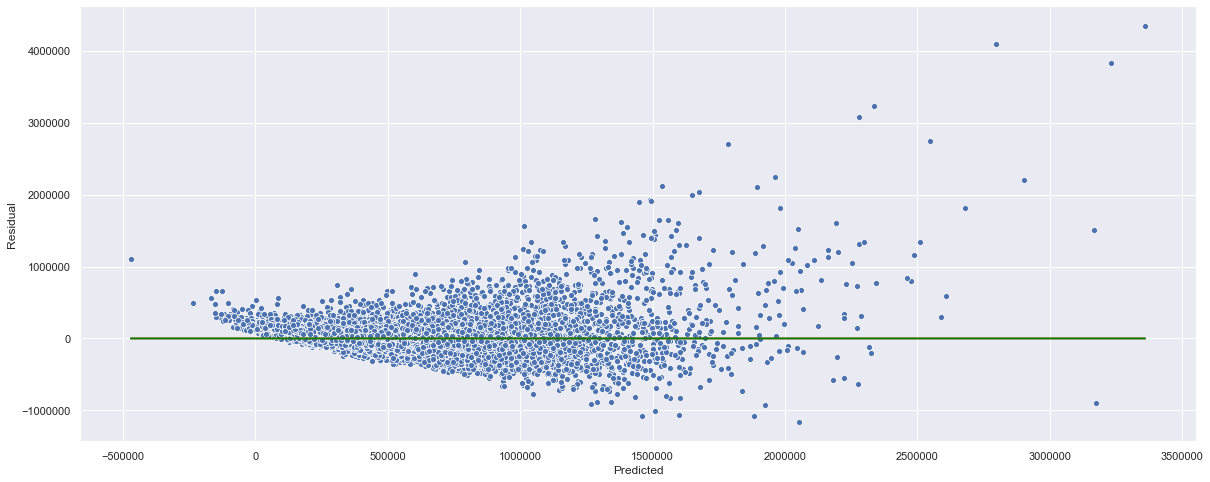

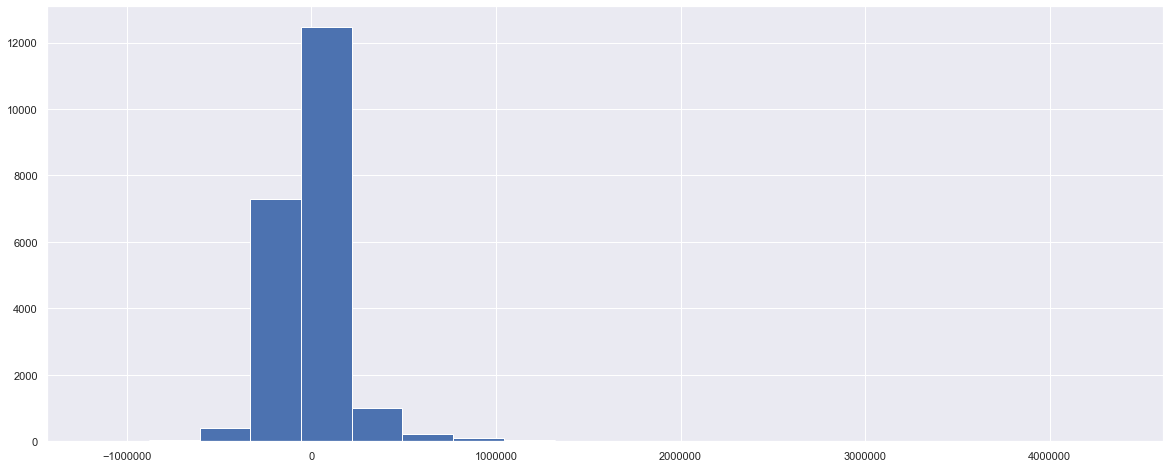

In [637]:
scaler = RobustScaler()
lr = LinearRegression()
pipe1 = make_pipeline(scaler, lr)


# Quick helper functions
def model_evaluate(old_pipe, bagging=True):
    if bagging:
        pipe = BaggingRegressor(old_pipe, n_estimators=3)
    else:
        pipe = old_pipe
        
    metrics = ['r2', 
               'neg_mean_absolute_error', 
               'neg_mean_squared_error']
    
    # cross validate returns a dictionary object
    # * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    preds = cross_validate(pipe, X, y, 
                           cv=3, n_jobs=-1, 
                           scoring=metrics,
                           return_estimator=True)

    print("-"*60)
    for i, tag in enumerate(preds):
        if 'time' not in tag and 'estimator' not in tag:
            print(tag, ":\n\t\t\t\t\t", 
                  "%.4f" % preds[tag].mean(), 
                  "+/-", 
                  "%.4f" % preds[tag].std())
            if i % 2 == 0:
                print()
                print("-"*60)
                
    if bagging:
        coeffs = []
        for i in range(3):
            for j in range(3):
                estimator = preds['estimator'][i].estimators_[j]
                modeling_step = estimator.steps[1][0]
                coef = estimator.named_steps[modeling_step].coef_
                coeffs.append(coef)

        coeffs = [(
            "Beta_%s" % (i+1), 
            "%.4f" % np.mean(coeffs, axis=0)[i],
            "%.4f" % np.std(coeffs, axis=0)[i],
        ) for i in range(len(used_cols))]
        for coeff in coeffs:
            print(coeff[0], ":\t", coeff[1], "+/-", coeff[2])

        print()
        print("-"*60)
        
    return preds['estimator'] # this is a list of pipelines


def model_predict(pipe):
    y_preds = [pipe[i].predict(X) for i in range(len(pipe))]
    y_pred = np.mean(y_preds, axis=0)
    return y_pred


def plot_residuals():
    SIZE = (20,8)

    plt.figure(figsize=SIZE)
    sns.scatterplot(y_pred, (y - y_pred))
    sns.lineplot(y_pred, [0]*len(y_pred), color='red')
    sns.lineplot(y_pred, [1]*len(y_pred), color='green')
    sns.lineplot(y_pred, [-1]*len(y_pred), color='green')
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.show()

    plt.figure(figsize=SIZE)
    plt.hist(y - y_pred, bins=20)
    # TODO: Add vertical lines at x=-1,0,1
    plt.show()


pipe1 = model_evaluate(pipe1) # returns a list of pipelines
y_pred = model_predict(pipe1)
plot_residuals()

Here, I was attempting to produced my own linear regression with sklearn.

In [846]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [1017]:
scaler = RobustScaler()
lr = LinearRegression()
pipe1 = make_pipeline(scaler, lr)

In [1027]:
scores = cross_val_score(pipe1, X, y, cv=5, scoring='r2')
print("R2:", scores.mean())

R2: 0.6946799966781809


The R^2 for the simple linear regression with no transformations was much worse than any of my previous models, with an R^2 of 0.6947.

Here I was attempted to log transform the data. While the histograms for each of the features that I used became more normalized, it made the regression error metrics much worse.

In [1020]:
data_log = pd.DataFrame([])
data_log['log_sqft_living'] = np.log(df['sqft_living'])
data_log['log_bathrooms'] = np.log(df['bathrooms'])
data_log['log_sqft_lot'] = np.log(df['sqft_lot'])
data_log['log_bedrooms'] = np.log(df['bedrooms'])
data_log['log_yr_built'] = np.log(df['yr_built'])
data_log['log_floors'] = np.log(df['floors'])
#data_log['log_waterfront'] = np.log(df['waterfront'])
#data_log['log_view'] = np.log(df['view'])
data_log['log_condition'] = np.log(df['condition'])
data_log['log_grade'] = np.log(df['grade'])
data_log['log_sqft_above'] = np.log(df['sqft_above'])
data_log['log_yr_built'] = np.log(df['yr_built'])
#data_log['log_yr_renovated'] = np.log(df['yr_renovated'])
data_log['log_zipcode'] = np.log(df['zipcode'])

In [1021]:
log_used_cols = [c for c in data_log.columns.tolist()]
log_X = data_log[log_used_cols]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1d78207908>,
      dtype=object)

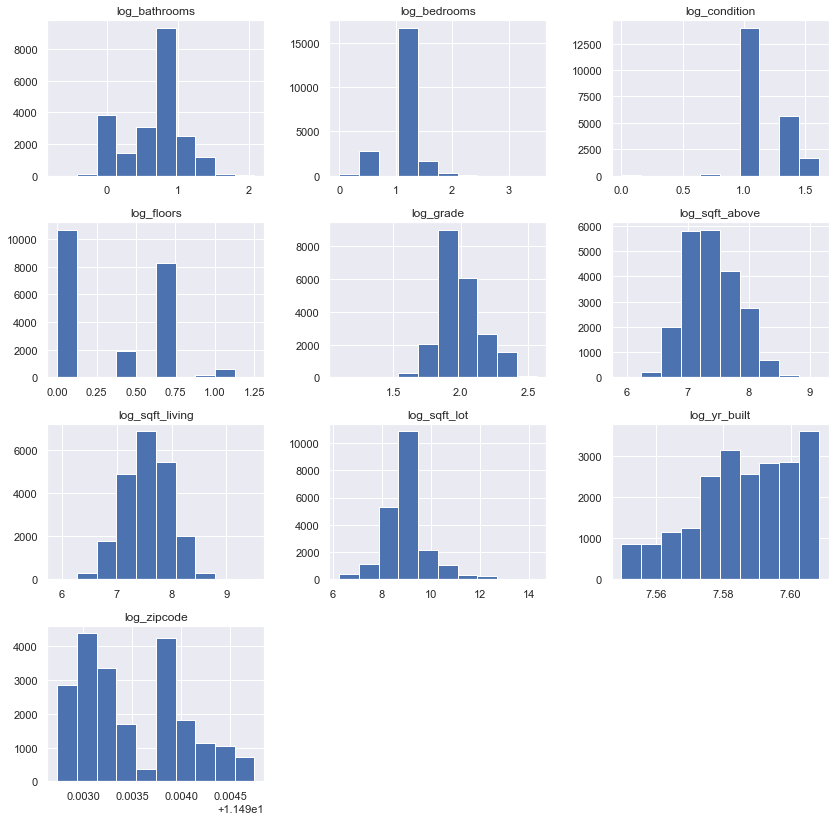

In [1022]:
data_log.hist(figsize  = [14,14])

In [1023]:
scaler = RobustScaler()
lr = LinearRegression()
pipe1 = make_pipeline(scaler, lr)

In [1028]:
scores = cross_val_score(pipe1, log_X, y, cv=5, scoring='r2')
print("R2:", scores.mean())

R2: 0.5299496145009841


Clearly, the R^2 after log transforming the data was much worse than before the transformation. I'm feel like I must be making a mistake, but I couldn't figure out what it was.

In [1039]:
scaler = RobustScaler()
lr = LinearRegression()
pipe1 = make_pipeline(scaler, lr)
scores = cross_val_score(pipe1, X, y, cv=5, scoring='r2')
print("R2:", scores.mean())

R2: 0.6946799966781809


# GAMs (Generalized Additive Models)

In [ ]:
pip install pygam

In [258]:
from pygam import LinearGAM

Despite not understanding the details of how to use GAMs, I took the code from Bryan's lecture to see if I could understand it by tinkering with the values.

In [936]:
used_cols = [c for c in df.columns.tolist() if c not in [target]]
X, y = df[used_cols], df[target]

In [638]:
gam = LinearGAM(n_splines=25)
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:55 Time:  0:00:55


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    272.1808
Link Function:                     IdentityLink Log Likelihood:                               -533725.8001
Number of Samples:                        21597 AIC:                                          1067997.9619
                                                AICc:                                         1068004.9874
                                                GCV:                                      22057998793.7595
                                                Scale:                                    21558183293.3035
                                                Pseudo R-Squared:                                   0.8423
Feature Function                  Lam

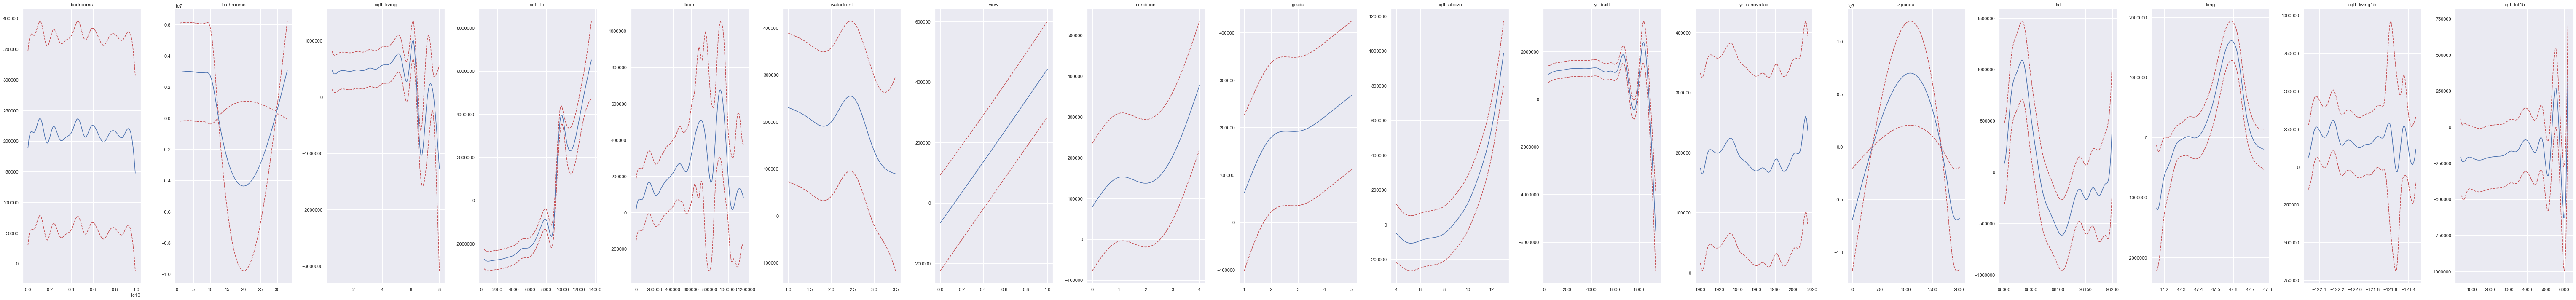

In [928]:
N = len(used_cols)
fig, axs = plt.subplots(1,N,figsize=(N*5,10))

titles = used_cols
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i]);
fig.tight_layout()
fig.show()

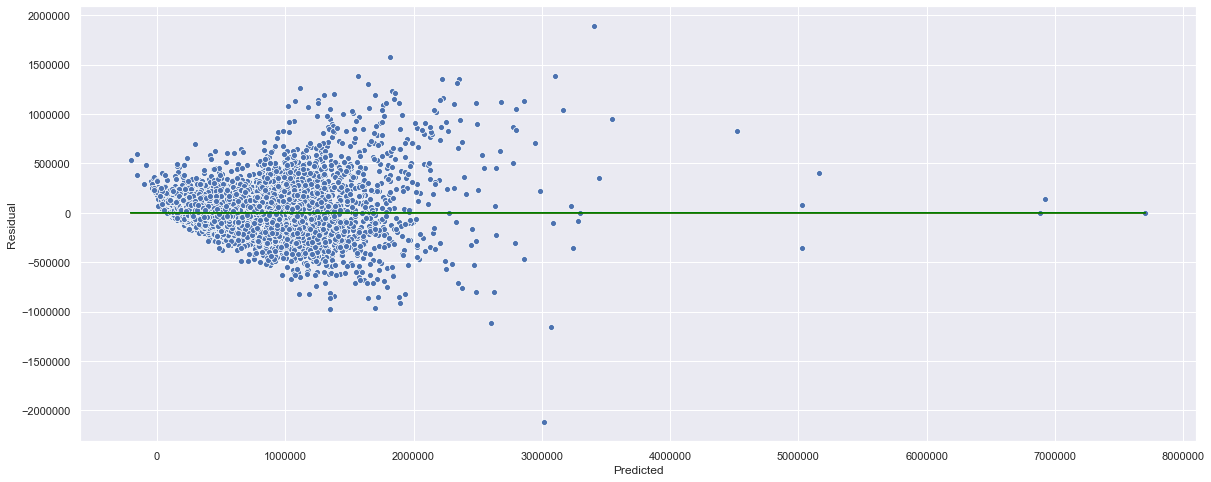

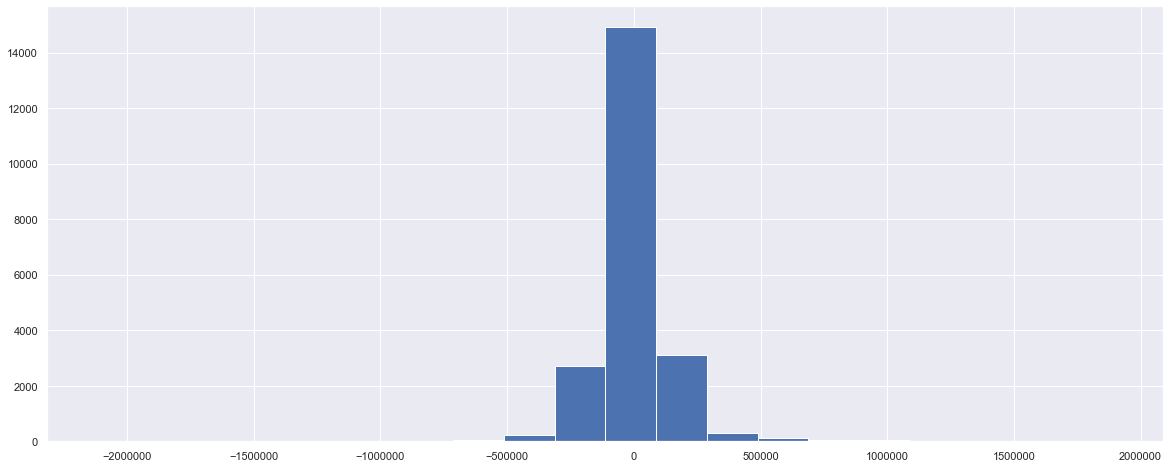

In [330]:
y_pred = model_predict([gam])
plot_residuals()

From the residual plot, the initial model is violating one of the key assumptions of linear regression of heteroscedasticity.

In [527]:
from pygam.terms import s as spline
from pygam.terms import f as factor
from pygam.terms import te as tensor

In [559]:
X

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3       1.00         1180      5650     1.0   
1      6414100192         3       2.25         2570      7242     2.0   
2      5631500400         2       1.00          770     10000     1.0   
3      2487200875         4       3.00         1960      5000     1.0   
4      1954400510         3       2.00         1680      8080     1.0   
...           ...       ...        ...          ...       ...     ...   
21592   263000018         3       2.50         1530      1131     3.0   
21593  6600060120         4       2.50         2310      5813     2.0   
21594  1523300141         2       0.75         1020      1350     2.0   
21595   291310100         3       2.50         1600      2388     2.0   
21596  1523300157         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  yr_built  yr_renovated  \
0             0.0   0.0          3      7        1180      1955           0.0   
1             0.0   0.0          3      7        2170      1951        1991.0   
2             0.0   0.0          3      6         770      1933           0.0   
3             0.0   0.0          5      7        1050      1965           0.0   
4             0.0   0.0          3      8        1680      1987           0.0   
...           ...   ...        ...    ...         ...       ...           ...   
21592         0.0   0.0          3      8        1530      2009           0.0   
21593         0.0   0.0          3      8        2310      2014           0.0   
21594         0.0   0.0          3      7        1020      2009           0.0   
21595         0.0   0.0          3      8        1600      2004           0.0   
21596         0.0   0.0          3      7        1020      2008           0.0   

       zipcode      lat     long  
0        98178  47.5112 -122.257  
1        98125  47.7210 -122.319  
2        98028  47.7379 -122.233  
3        98136  47.5208 -122.393  
4        98074  47.6168 -122.045  
...        ...      ...      ...  
21592    98103  47.6993 -122.346  
21593    98146  47.5107 -122.362  
21594    98144  47.5944 -122.299  
21595    98027  47.5345 -122.069  
21596    98144  47.5941 -122.299  

[21597 rows x 16 columns]

I tried runnning again after tensoring latitude and longitude.

In [583]:
X, y = df[used_cols], df[target]

In [898]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [932]:
term_list = []
for i, col in enumerate(used_cols):
    term_list.append(spline(i))

# add the x1 and x2 interaction term
term_list.append(tensor(13, 14))

# create the terms and model
terms = np.sum(term_list)
print(terms)
gam = LinearGAM(terms=terms).gridsearch(X_train.values, y_train.values)
gam.summary()

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + te(13, 14)


100% (11 of 11) |########################| Elapsed Time: 0:00:31 Time:  0:00:31


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    259.1939
Link Function:                     IdentityLink Log Likelihood:                                -398904.646
Number of Samples:                        16197 AIC:                                           798329.6799
                                                AICc:                                          798338.2092
                                                GCV:                                      20394903357.0366
                                                Scale:                                     19808284371.979
                                                Pseudo R-Squared:                                    0.861
Feature Function                  Lam

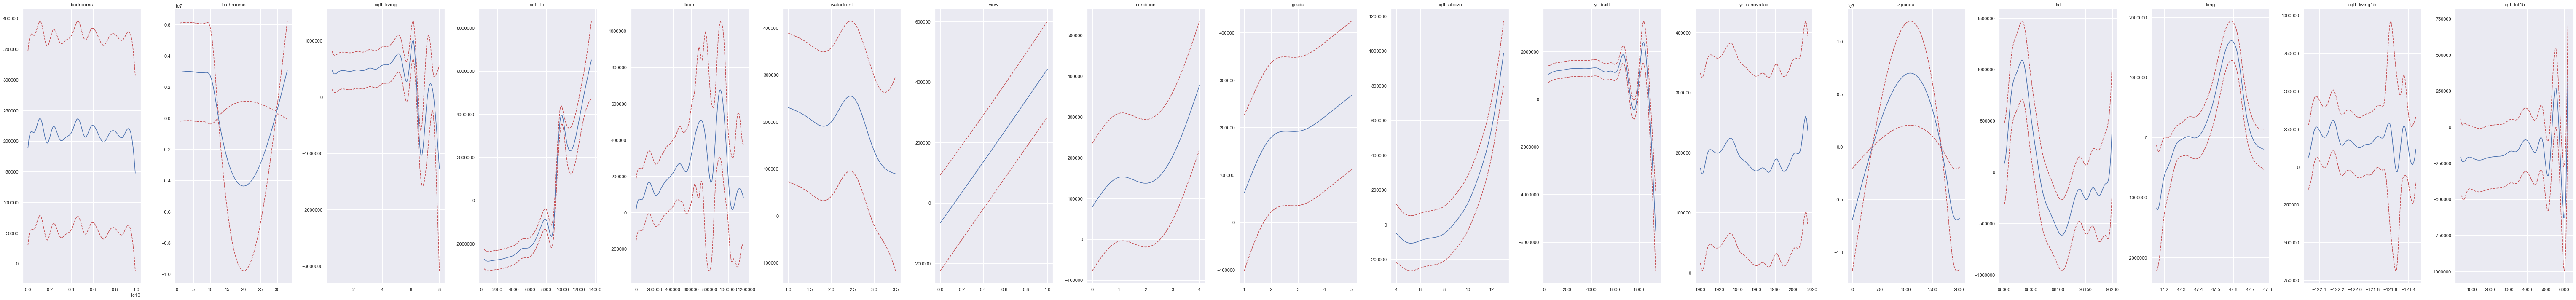

In [930]:
N = len(used_cols)
fig, axs = plt.subplots(1,N,figsize=(N*5,10))

titles = used_cols
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i]);
fig.tight_layout()
fig.show()

In [934]:
pred = gam.predict(X_test.values)

In [935]:
print("R^2 for GAM Model:", r2_score(pred, y_test))
print("Mean Absolute Error:", mean_absolute_error(pred, y_test))

R^2 for GAM Model: 0.8211132737717974
Mean Absolute Error: 85746.58076032337


As a result of tensoring latitude and longitude, the pseudo R^2 improved from 0.8423 to 0.861.

In [1046]:
pipe1 = make_pipeline(LinearGAM())
scores = cross_val_score(pipe1, X, y, cv=5, scoring='r2')
print("R2:", scores.mean())

RuntimeError: Cannot clone object LinearGAM(callbacks=['deviance', 'diffs'], fit_intercept=True, 
   max_iter=100, scale=None, terms='auto', tol=0.0001, verbose=False), as the constructor either does not set or modifies parameter callbacks

After reading up on GAMs, I still can't seem to figure out how to use it without copying it.